# PC 2 : Réduction de dimension - 10 juin 2020

Dans ce notebook, nous allons effectuer une analyse en composantes principales d'un jeu de données décrivant les scores obtenus par les meilleurs athlètes ayant participé en 2004 à une épreuve de décathlon, aux Jeux Olympiques d'Athènes ou au Décastar de Talence.

Nous utiliserons pour cela la toolbox `scikit-learn` : http://scikit-learn.org/stable/index.html. `scikit-learn` est un ensemble de librairies de machine learning très utilisée et qui implémente la plupart des algorithmes d'apprentissage automatique non-profond. Il s'agit d'un projet Open Source. 

Dans une deuxième partie facultative, vous pourrez vous essayer à implémenter l'ACP vous-mêmes.

## Librairies python 

Ce notebook a été créé avec les versions suivantes des librairies :
* numpy 1.20.2
* matplotlib 3.4.2
* pandas 1.2.4
* sklearn 0.24.2
* seaborn 0.11.1

Tout devrait bien se passer si vous êtes bien dans l'environnement conda `sdd2021` chargé grâce au fichier `environment.yml` à la racine du repo. Des différences de version peuvent expliquer des comportements inattendus (avertissements, messages d'erreurs, fonctionalités inexistantes) mais il n'est pas nécessaire a priori d'avoir exactement les versions listées ci-dessus. Si vous souhaitez vérifier les versions des différentes librairies que vous utilisez, vous pouvez utiliser (après les import correspondant bien sûr) le code suivant :
```python
print(np.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(sklearn.__version__)
print(sns.__version__)
```

In [ ]:
# charger numpy as np, matplotlib as plt
%pylab inline 

In [ ]:
plt.rc('font', **{'size': 14}) # règle la taille de police globalement pour les plots (en pt)

In [ ]:
import pandas as pd

## 1. Données

Les données sont contenues dans le fichier `data/decathlon.txt`.

Le fichier contient 42 lignes et 13 colonnes.

La première ligne est un en-tête qui décrit les contenus des colonnes.

Les lignes suivantes décrivent les 41 athlètes.

Les 10 premières colonnes contiennent les scores obtenus aux différentes épreuves.
La 11ème colonne contient le classement.
La 12ème colonne contient le nombre de points obtenus.
La 13ème colonne contient une variable qualitative qui précise l'épreuve (JO ou Décastar) concernée.

Nous allons examiner ces données avec la librairie `pandas`.

In [ ]:
import pandas as pd
my_data = pd.read_csv('data/decathlon.txt', sep="\t")  # lire les données dans un dataframe

In [ ]:
my_data.head()

## 2. Quelques rappels sur `pandas`

Assurez-vous que vous comprenez l'usage des fonctionalités ci-dessous

In [ ]:
# Lister les noms des colonnes
my_columns = list(my_data.columns) 
print(my_columns)

In [ ]:
# Sélectionner une colonne
my_data['100m'].head()

In [ ]:
# Sélectionner plusieurs colonnes
columns = ['100m', '400m']
my_data[columns].head()

In [ ]:
# Sélectionner des lignes à partir de la valeur d'une colonne
my_data[my_data['Competition']=='OlympicG'].head()

In [ ]:
# Dimensions des données
print(my_data.shape)  

In [ ]:
# Valeurs du tableau sous forme d'array numpy
my_data_values = my_data.values
print(type(my_data_values))
print(my_data_values.shape)

In [ ]:
# Type des colonnes
print(my_data.dtypes)  

## 3. Exploration des données

### 3.1. Couples de variables
Représentons les différents athlètes selon leur performance au 400m et au lancer du poids (`Shot.put`)

In [ ]:
plt.scatter(my_data['400m'], my_data['Shot.put'], s=50)

plt.xlabel('Performance au 400m')
plt.ylabel('Performance au lancer du poids')

Les fourchettes de valeur prises par ces deux variables sont différentes, leurs unités aussi. Pour mieux les comparer il est souhaitable de les standardiser.

In [ ]:
fig = plt.figure(figsize=(5, 5)) # forcer une figure carrée

data_400m_std = (my_data['400m'] - np.mean(my_data['400m']))/(np.std(my_data['400m']))
data_shotput_std = (my_data['Shot.put'] - np.mean(my_data['Shot.put']))/(np.std(my_data['Shot.put']))


plt.scatter(data_400m_std, data_shotput_std, s=50)

plt.xlabel('400m (performance standardisée)')
plt.ylabel('Lancer du poids (performance standardisée)')

__Question :__ Ce nuage de points vous semble-t-il suggérer que les deux performances sont corrélées ?

__Réponse :__ 

Nous pouvons calculer leur coefficient de corrélation de Pearson grâce au module `scipy.stats`. La fonction `pearsonr` renvoie même une p-valeur : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [ ]:
import scipy.stats as st

In [ ]:
r, pval = st.pearsonr(my_data['400m'], my_data['Shot.put'])
print("Corrélation entre le lancer du poids et le 400m : %.2f (p=%.2e)" % (r, pval))

__Question :__ Cela vous semble-t-il en accord avec le nuage de points ?

__Réponse :__ 

__Question :__ Choisissez deux variables dont il vous semble vraisemblable qu'elles soient corrélées. Affichez le nuage de points correspondant. Calculez le coefficient de corrélation de Pearson. Souhaitez-vous rejeter votre hypothèse ?

__Réponse :__

### 3.2 [Pour aller plus loin] Matrice de nuages de points avec pandas
Une matrice de nuages de points est une visualisation en k x k panneaux des relations deux à deux entre k variables :
* sur la diagonale, l'histogramme pour chacune des variables 
* hors diagonale, les nuages de points entre deux variables (non standardisées).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(my_data[['Shot.put','High.jump', '400m']], alpha=0.5, s=60,
               figsize=(8, 8));

### 3.3 [Pour aller plus loin] Seaborn
La librairie `seaborn` permet des visualisations plus élaborées que `matplotlib`. Vous pouvez par exemple explorer les capacités de `jointplot`. 
https://seaborn.pydata.org/generated/seaborn.jointplot.html

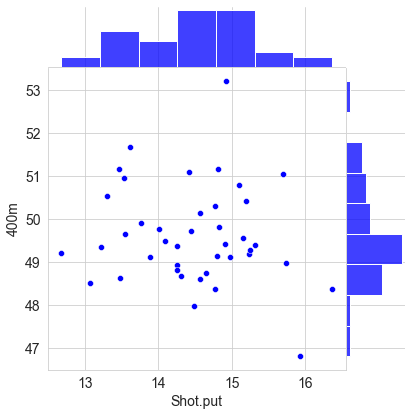

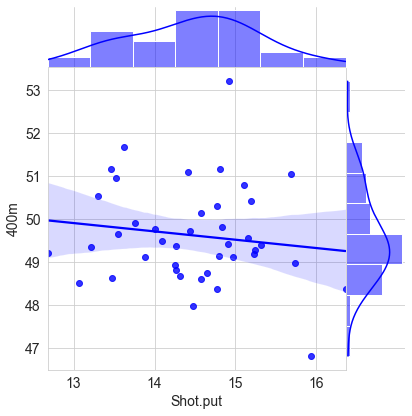

In [44]:
# fancier plot with seaborn : https://seaborn.pydata.org/
import seaborn as sns
sns.set_style('whitegrid')

sns.jointplot(x='Shot.put', y='400m', data = my_data, 
              height=6, space=0, color='b')

sns.jointplot(x='Shot.put', y='400m', data = my_data, 
              kind='reg', height=6, space=0, color='b')

## 4. ACP des scores aux 10 épreuves

Nous allons maintenant effectuer une analyse en composantes principales des scores aux 10 épreuves.

### 4.1 Création de l'array numpy correspondant

In [ ]:
X = np.array(my_data.drop(columns=['Points', 'Rank', 'Competition']))
print(X.shape)

__Question :__ 
* Quel est le nombre d'individus dans la matrice de données `X` ?
* Quel est le nombre de variables dans la matrice de données `X` ?

__Réponse :__ 

### 4.2 Standardisation des données

Plus haut, nous avons standardisé les variables nous-mêmes en leur retirant leur moyenne et en les divisant par leur écart-type. Cette tâche est entièrement automatisée par `scikit-learn` :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn import preprocessing

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### 4.3 Calcul des composantes principales

Les algorithmes de factorisation de matrice de `scikit-learn` sont inclus dans le module `decomposition`. Pour  l'ACP, référez-vous à : 
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn import decomposition

Remarque : Nous avons ici peu de variables et pouvons nous permettre de calculer toutes les PC. 

La plupart des algorithmes implémentés dans `scikit-learn` suivent le fonctionnement suivant : 
* on instancie un objet, correspondant à un type d'algorithme/modèle, avec ses hyperparamètres (ici le nombre de composantes)
* on utilise la méthode `fit` pour passer les données à cet algorithme
* les paramètres appris sont maintenant accessibles comme arguments de cet objet.

In [ ]:
# Instanciation d'un objet PCA pour 10 composantes principales
pca = decomposition.PCA(n_components=10)
print(type(pca))

In [ ]:
# On passe maintenant les données standardisées à cet objet
# C'est ici que se font les calculs
pca.fit(X_scaled)

### 4.4 Proportion de variance expliquée par les PCs

Nous allons maintenant afficher la proportion de variance expliquée par les différentes composantes. Il est accessible dans le paramètre `explained_variance_ration_` de notre objet `pca`.

In [ ]:
plt.plot(np.arange(10), pca.explained_variance_ratio_, marker='o')

plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")

__Question :__ Affichez la proportion *cumulative* de variance expliquée

__Réponse :__

__Questions :__ 
* Quelle est la proportion de variance expliquée par les deux premières composantes ? 
* Combien de composantes faudrait-il utiliser pour expliquer 80% de la variance des données ?

__Réponse :__

### 4.5 Projection des données sur les deux premières composantes principales

Nous allons maintenant utiliser uniquement les deux premières composantes principales.

Commençons par calculer la nouvelle représentation des données, c'est-à-dire leur projection sur ces deux PC. 

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

__Question :__ Affichez un nuage de point représentant les données selon ces deux PC.

__Réponse :__

__Question :__ Colorez chaque point du nuage de points ci-dessus en fonction du classement de l'athlète qu'il représente. Qu'en conclure sur l'interprétation de la PC1 ?

__Réponse :__

### 4.6 Interprétation des deux composantes principales
Chaque composante principale est une combinaison linéaire des variables décrivant les données. Les poids de cette combinaison linéaire sont accesibles dans `pca.components_`.

Nous pouvons visualiser non pas les individus, mais les 10 variables dans l'espace des 2 composantes principales.

In [ ]:
pcs = pca.components_
print(pcs[0])

In [ ]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(pcs[0], pcs[1])
for (x_coordinate, y_coordinate, feature_name) in zip(pcs[0], pcs[1], my_data.columns[:10]):
    plt.text(x_coordinate, y_coordinate, feature_name)                          
    
plt.xlabel("Contribution à la PC1")
plt.ylabel("Contribution à la PC2")

__Question :__ Quelles variables ont des contributions très similaires aux deux composantes principales ? Qu'en déduire sur leur similarité ?

__Réponse :__ 

__Question :__ Comment interpréter le signe des contributions des variables à la première composantes principales ?

__Réponse :__  

__Question facultative :__ Comment les valeurs de `pca.explained_variance_ratio_` sont-elles obtenues ? Refaites le calcul vous-mêmes.

## 5 [Pour aller plus loin] Implémentation de l'ACP
Cette partie s'inspire d'un notebook proposé par Joseph Boyd et Benoît Playe.

## 5.1 Décomposition spectrale de la matrice de covariance

Les deux premières composantes principales de X sont les deux vecteurs propres correspondant aux deux plus grandes valeurs propres de la matrice de covariance $\Sigma = \frac1n X^\top X.$

__Question :__ Utilisez `nunpy.linalg` pour calculer les deux premières composantes principales de X. N'oubliez pas de travailler sur `X_scaled`. Comparez les à celles obtenues dans `pca.components_`.

__Question :__ Calculez la nouvelle représentation en deux dimensions des données. Comparez à celle obtenue dans `pca.components_`.

## 5.2 Décomposition en valeurs singulières

__Question :__ Utiliser `linalg.svd` pour retrouver les deux premières composantes principales. Comparer.